In [13]:
import numpy as np
import pandas as pd
from collections import Counter
import operator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math

In [14]:
class kNearestNeighbors:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        print("Training Done")

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distance = []
            for i, train_point in enumerate(self.X_train):
                dist = ((test_point[0] - train_point[0])**2 + (test_point[1] - train_point[1])**2)**0.5
                distance.append((i, dist))
            distance.sort(key=operator.itemgetter(1))
            predictions.append(self.weighted_classify(distance[:self.k]))
        return predictions
    def classify(self, distance):
        labels = [self.Y_train[i[0]] for i in distance]
        return Counter(labels).most_common(1)[0][0]
    def weighted_classify(self, distances):
        # Calculate the weighted vote for each class based on the distance
        weights = {}
        for i, dist in distances:
            label = self.Y_train[i]
            weight = 1 / (dist + 1e-5)  # Avoid division by zero (add a small epsilon)
            if label in weights:
                weights[label] += weight
            else:
                weights[label] = weight
        # Return the label with the highest weighted sum
        return max(weights, key=weights.get)




In [15]:
#Load the dataset
data = pd.read_csv('iris.csv')
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Split data into features and labels
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# List of k values to test
n_samples = int(math.sqrt(len(X_train)))

In [19]:
# List of k values to test
n_samples = int(math.sqrt(len(X_train)))

In [20]:
simple_knn_accuracies = []
weighted_knn_accuracies = []

# Loop over different values of k
for i in range(1,n_samples+1):
    simple_knn = kNearestNeighbors(k=i)
    simple_knn.fit(X_train,Y_train)
    simple_predictions = simple_knn.predict(X_test)
    simple_acc = accuracy_score(Y_test,simple_predictions)
    simple_knn_accuracies.append(simple_acc)
    #Weighted knn
    weighted_knn = kNearestNeighbors(k=i)
    weighted_knn.fit(X_train,Y_train)
    weighted_predictions = weighted_knn.predict(X_test)
    weighted_acc = accuracy_score(Y_test,weighted_predictions)
    weighted_knn_accuracies.append(weighted_acc)

Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done
Training Done


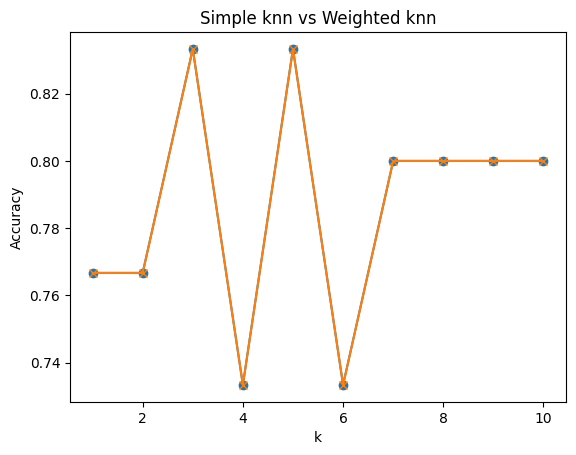

In [21]:
plt.plot(range(1,n_samples+1),simple_knn_accuracies,label='Simple KNN',marker='o')
plt.plot(range(1,n_samples+1),weighted_knn_accuracies,label='Weighted KNN',marker='x')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title("Simple knn vs Weighted knn")
plt.show()

In [22]:
simple_optimal_k = simple_knn_accuracies.index(max(simple_knn_accuracies))
weighted_optimal_k = weighted_knn_accuracies.index(max(weighted_knn_accuracies))

In [23]:
knn = kNearestNeighbors(k=simple_optimal_k)
knn.fit(X_train,Y_train)
def get_input():
    num_features = X_train.shape[1]
    sample = []
    for i in range(num_features):
        feature_value = float(input(f"Enter value for feature {i+1}: "))
        sample.append(feature_value)
    return sample
def predict_new(sample):
    X_new = scaler.transform(np.array(sample).reshape(1,-1))


    #Predict the result
    result = knn.predict(X_new)


    return result


# Sepal_length = float(input("Enter Sepal Length: "))
# Sepal_width = float(input("Enter Sepal Width:  "))
# Petal_length = float(input("Enter Petal Length: "))
# Petal_width = float(input("Enter Petal Width: "))
# new_sample = [5.9,3.0,5.1,1.8]
new_sample = [get_input()]
predicted_class = predict_new(new_sample)
print(f"The predicted class for the new sample is :{predicted_class}")






# Run the prediction function for a new input
# predict_new()


Training Done
Enter value for feature 1: 4.5
Enter value for feature 2: 3.3
Enter value for feature 3: 2.5
Enter value for feature 4: 1.5
The predicted class for the new sample is :['Iris-setosa']
